# Data Visualization & Analysis

## Load Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import umap.umap_ as umap # install "umap-learn" instead of "umap"
from IPython.display import display

In [2]:
# Read raw data
original = pd.read_csv('Data/genelevel_rsem_expectedcounts_byrid_nooutliers.counts.matrix.tsv', sep = '\t', index_col = [0])
original = original.transpose()
original.index.name = 'r_id'
original.reset_index(inplace = True)

display(original.head())
display(original.shape)

,r_id,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,...,ENSG00000283690,ENSG00000283691,ENSG00000283692,ENSG00000283693,ENSG00000283694,ENSG00000283695,ENSG00000283696,ENSG00000283697,ENSG00000283698,ENSG00000283699
0,100_2,225.0,0.0,254.0,422.99,272.0,21.0,165.00,107.0,449.0,...,0.0,0.0,2.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0
1,101_3,252.0,0.0,301.0,510.00,310.0,12.0,178.96,150.0,624.0,...,0.0,0.0,3.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0
2,102_2,136.0,1.0,173.0,272.00,204.0,21.0,111.49,94.0,219.0,...,0.0,0.0,2.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0
3,103_3,166.0,4.0,264.0,301.00,224.0,11.0,181.77,78.0,583.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0
4,104_2,207.0,0.0,307.0,417.00,227.0,16.0,244.00,114.0,499.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0


(453, 58052)

In [3]:
# Read batch-corrected data
cleaned = pd.read_csv('Data/batchcorrected_log2cpm.tsv', sep = '\t', index_col = [0])
cleaned = cleaned.transpose()
cleaned.index.name = 'r_id'
cleaned.reset_index(inplace = True)

display(cleaned.head())
display(cleaned.shape)

,r_id,ENSG00000000003,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,...,ENSG00000283529,ENSG00000283536,ENSG00000283590,ENSG00000283617,ENSG00000283619,ENSG00000283623,ENSG00000283633,ENSG00000283662,ENSG00000283667,ENSG00000283674
0,100_2,4.224093,4.273573,4.716466,4.126170,1.171196,4.015480,3.293096,5.294673,5.504096,...,1.145577,3.068081,1.881444,1.346983,1.513299,0.797770,0.419013,0.843287,1.047956,1.928373
1,101_3,4.088110,4.278318,4.969749,4.528228,0.862429,3.843299,3.390655,5.527211,5.846664,...,1.189183,2.866956,1.795239,2.366877,1.177736,1.070189,1.483662,0.637100,1.125788,1.522671
2,102_2,4.108960,4.508365,4.852762,4.286024,1.540143,3.846015,3.596859,4.948842,5.788883,...,0.915614,2.886454,1.835291,2.017325,1.232213,0.841682,0.010696,0.723624,1.194329,1.378135
3,103_3,4.338494,4.533990,4.947713,4.310150,1.105556,3.877232,3.448069,5.472893,5.687792,...,0.850755,2.891162,1.961135,1.967287,1.947879,0.387205,0.712213,0.256273,1.322104,2.025008
4,104_2,4.144095,4.451600,4.882771,4.150902,1.375205,4.456291,3.501590,5.159368,5.646700,...,0.647376,3.128063,2.011594,1.556070,0.814551,1.100907,1.155770,0.919095,1.381362,1.788005


(453, 18054)

In [4]:
# Read trainning set of data
train = pd.read_csv('Data/train_genelevel_90%.tsv', sep = '\t', index_col = [0])
train = train.transpose()
train.index.name = 'r_id'
train.reset_index(inplace = True)

display(train.head())
display(train.shape)

,r_id,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,ENSG00000001460,...,ENSG00000283686,ENSG00000283688,ENSG00000283689,ENSG00000283690,ENSG00000283691,ENSG00000283693,ENSG00000283695,ENSG00000283696,ENSG00000283698,ENSG00000283699
0,205_2,202.0,261.0,194.0,25.0,428.00,169.0,709.0,557.0,354.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.0
1,251_1,243.0,369.0,188.0,15.0,91.06,118.0,396.0,484.0,533.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,474_3,230.0,355.0,234.0,14.0,83.00,92.0,424.0,502.0,470.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,178_4,270.0,375.0,236.0,14.0,184.00,87.0,442.0,1020.0,612.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0
4,313_1,232.0,317.0,385.0,14.0,167.78,94.0,403.0,747.0,305.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


(407, 55170)

## Relation with Batches

In [5]:
# Merge gene data in training set with batches to take into account
meta_retina = pd.read_csv('Data/meta_retina.csv', encoding = 'mac_roman')
batches = pd.DataFrame(meta_retina, columns = ["rna_isolation_batch", "library_prepper", "sex", "age"])
df = batches.join(train, how = 'inner')
df = df.dropna(axis = 0)

display(df.head())
display(df.shape)

,rna_isolation_batch,library_prepper,sex,age,r_id,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,...,ENSG00000283686,ENSG00000283688,ENSG00000283689,ENSG00000283690,ENSG00000283691,ENSG00000283693,ENSG00000283695,ENSG00000283696,ENSG00000283698,ENSG00000283699
0,isobatch1,MRS,M,61.0,205_2,202.0,261.0,194.0,25.0,428.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.0
1,isobatch1,RRP,F,77.0,251_1,243.0,369.0,188.0,15.0,91.06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,isobatch1,RRP,F,81.0,474_3,230.0,355.0,234.0,14.0,83.00,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,isobatch1,RRP,F,88.0,178_4,270.0,375.0,236.0,14.0,184.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0
4,isobatch1,RRP,F,75.0,313_1,232.0,317.0,385.0,14.0,167.78,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


(406, 55174)

In [6]:
# Functions that shows the relation between expression and batch for a specific gene
def map_to_age(df, gene_id):
    
    df_stage = []
    for i in range(4):
        df_stage.append(df[df.r_id.str.contains('_' + str(i + 1))])
    labels = ['No AMD / normal', 'Early stage AMD', 'Intermediate AMD', 'Advanced AMD']
    fig, ax = plt.subplots(figsize = (16, 12), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(4):
        ax.scatter(df_stage[i]['age'], df_stage[i][gene_id], label = labels[i])
    ax.legend()
    plt.title('Gene Expression v.s. Age (id: ' + gene_id +')', fontsize = 18)
    plt.xlabel('Age', fontsize = 18)
    plt.ylabel('The Degree of Gene Expression', fontsize = 18)
    plt.show()

def map_to_gender(df, gene_id):
    
    df_stage = []
    for i in range(4):
        df_stage.append(df[df.r_id.str.contains('_' + str(i + 1))])
    gender1 = ['F', 'M']
    gender2 = ['Female', 'Male']
    labels = ['No AMD / normal', 'Early stage AMD', 'Intermediate AMD', 'Advanced AMD']
    colors = ['blue', 'orange', 'green', 'red']
    tick = round((max(df[gene_id]) - min(df[gene_id]))) / 5
    ticks = []
    for i in range(-2, 5):
        ticks.append(round(min(df[gene_id])) + i * tick)
    fig, ax = plt.subplots(nrows = 2, ncols = 4, figsize = (16, 6))
    for i in range(2):
        for j in range(4):
            ax[i][j].scatter(df_stage[j][df_stage[j].sex == gender1[i]]['r_id'], 
                             df_stage[j][df_stage[j].sex == gender1[i]][gene_id], c = colors[j])
            ax[i][j].get_xaxis().set_visible(False)
            ax[i][j].set_yticks(ticks)
            #ax[i][j].set_ylabel('The Degree of Gene Expression')
            ax[i][j].set_title(gender2[i] + ", " + labels[j])
    fig.suptitle('Gene Expression v.s. Gender (id: ' + gene_id + ')', fontsize = 18)
    plt.show()

def map_to_lib_prep(df, gene_id):
    
    df_stage = []
    for i in range(4):
        df_stage.append(df[df.r_id.str.contains('_' + str(i + 1))])
    lib_prep = ['MRS', 'RRP']
    labels = ['No AMD / normal', 'Early stage AMD', 'Intermediate AMD', 'Advanced AMD']
    colors = ['blue', 'orange', 'green', 'red']
    tick = round((max(df[gene_id]) - min(df[gene_id]))) / 5
    ticks = []
    for i in range(-2, 5):
        ticks.append(round(min(df[gene_id])) + i * tick)
    fig, ax = plt.subplots(nrows = 2, ncols = 4, figsize = (16, 6))
    for i in range(2):
        for j in range(4):
            ax[i][j].scatter(df_stage[j][df_stage[j].library_prepper == lib_prep[i]]['r_id'], 
                             df_stage[j][df_stage[j].library_prepper == lib_prep[i]][gene_id], c = colors[j])
            ax[i][j].get_xaxis().set_visible(False)
            ax[i][j].set_yticks(ticks)
            #ax[i][j].set_ylabel('The Degree of Gene Expression')
            ax[i][j].set_title(lib_prep[i] + ", " + labels[j])
    fig.suptitle('Gene Expression v.s. Library Prepper (id: ' + gene_id + ')', fontsize = 18)
    plt.show()
    
def map_to_ria(df, gene_id):
    
    df_stage = []
    for i in range(4):
        df_stage.append(df[df.r_id.str.contains('_' + str(i + 1))])
    ria = ['isobatch1', 'isobatch2']
    labels = ['No AMD / normal', 'Early stage AMD', 'Intermediate AMD', 'Advanced AMD']
    colors = ['blue', 'orange', 'green', 'red']
    tick = round((max(df[gene_id]) - min(df[gene_id]))) / 5
    ticks = []
    for i in range(-2, 5):
        ticks.append(round(min(df[gene_id])) + i * tick)
    fig, ax = plt.subplots(nrows = 2, ncols = 4, figsize = (16, 6))
    for i in range(2):
        for j in range(4):
            ax[i][j].scatter(df_stage[j][df_stage[j].rna_isolation_batch == ria[i]]['r_id'], 
                             df_stage[j][df_stage[j].rna_isolation_batch == ria[i]][gene_id], c = colors[j])
            ax[i][j].get_xaxis().set_visible(False)
            ax[i][j].set_yticks(ticks)
            #ax[i][j].set_ylabel('The Degree of Gene Expression')
            ax[i][j].set_title(ria[i] + ", " + labels[j])
    fig.suptitle('Gene Expression v.s. RNA Isolation Batch (id: ' + gene_id + ')', fontsize = 18)
    plt.show()

def map_to_all(df, gene_id):
    
    map_to_age(df, gene_id)
    map_to_gender(df, gene_id)
    map_to_lib_prep(df, gene_id)
    map_to_ria(df, gene_id)

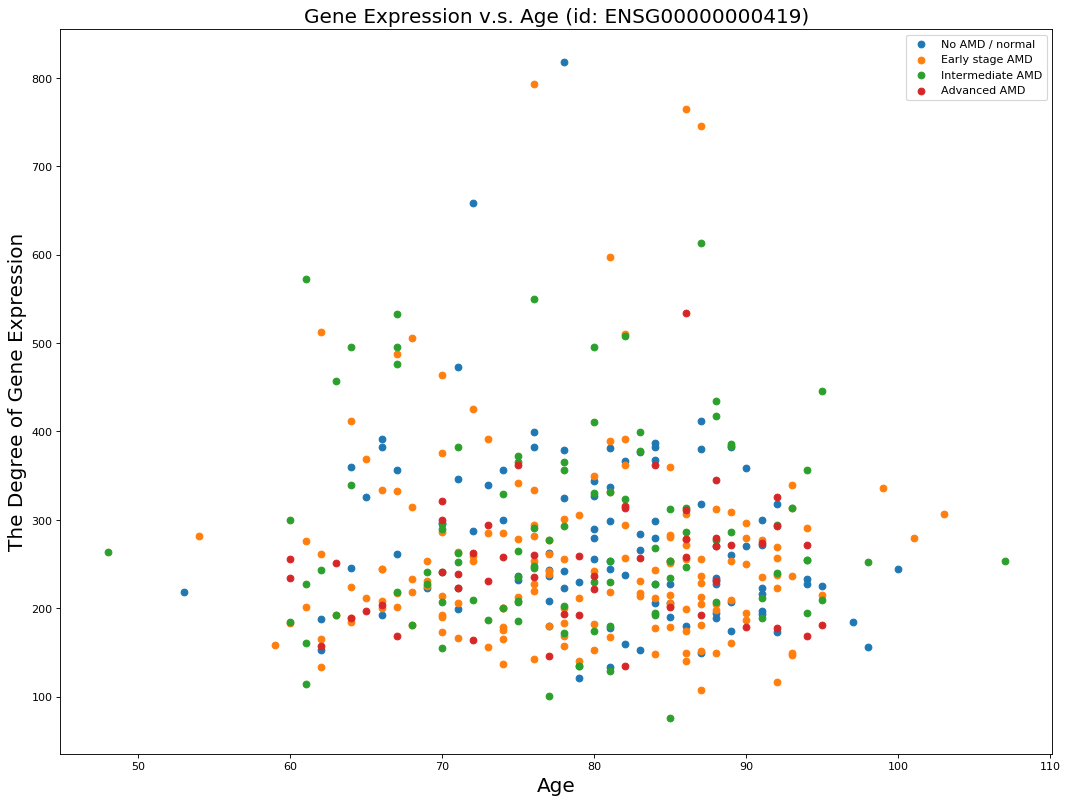

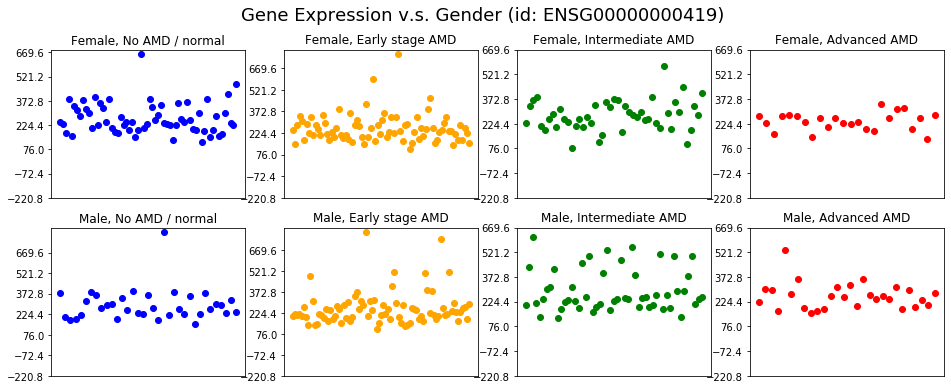

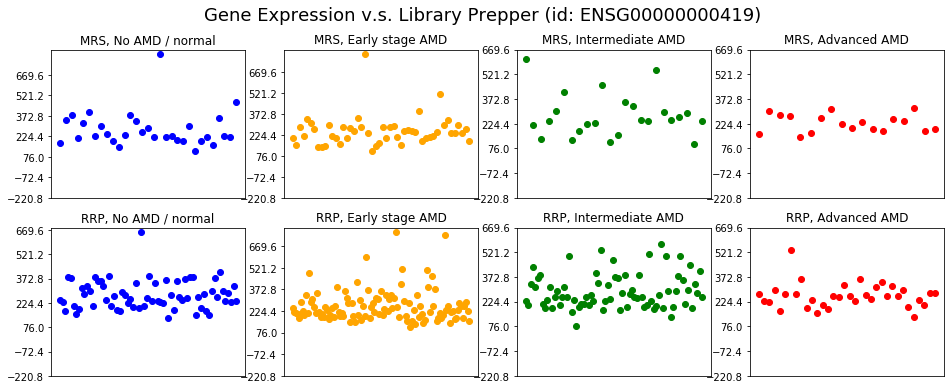

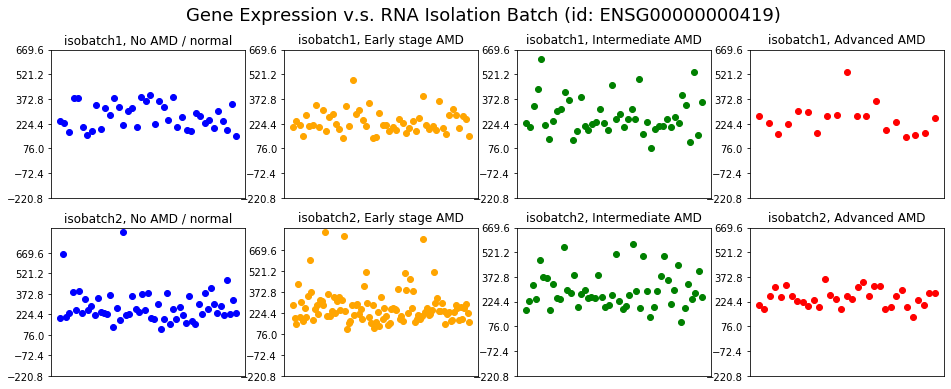

In [7]:
# Usage example of methods above
gene_id = 'ENSG00000000419'
map_to_all(df, gene_id)

## Dimentional Reduction

In [8]:
# Default parameters of umap.UMAP: 
#     n_components = 2 (The dimension of the space to embed into)
#     n_neighbors = 15 (The size of local neighborhood, global v.s. local)
#     min_dist = 0.1 (The effective minimum distance between embedded points, degree of tightness)
#     metric = 'euclidean' (The metric to use to compute distances in high dimensional space)
params = [2, 30, 0.2, 'euclidean']

In [9]:
# Divide original data into 4 group according to AMD stages
original_stage1 = original[original.r_id.str.contains('_1')]
original_stage2 = original[original.r_id.str.contains('_2')]
original_stage3 = original[original.r_id.str.contains('_3')]
original_stage4 = original[original.r_id.str.contains('_4')]
X = np.vstack([original_stage1, original_stage2, original_stage3, original_stage4])

label_stage1 = np.zeros(len(original_stage1))
label_stage2 = np.ones(len(original_stage2))
label_stage3 = np.full(len(original_stage3), 2)
label_stage4 = np.full(len(original_stage4), 3)
y = np.concatenate([label_stage1, label_stage2, label_stage3, label_stage4])

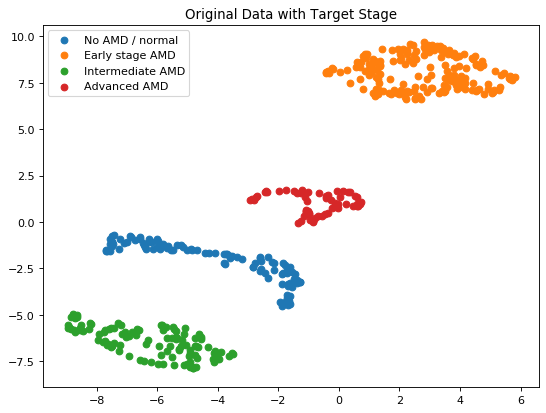

In [10]:
# Ideal case where correct classification (target array) is provided
X_embedded = umap.UMAP(
    n_components = params[0],
    n_neighbors = params[1],
    min_dist = params[2],
    metric = params[3]
).fit_transform(X, y)

fig, ax = plt.subplots(figsize = (8, 6), dpi = 80, facecolor = 'w', edgecolor = 'k')
pc1 = ax.scatter(X_embedded[y == 0, 0], X_embedded[y == 0, 1], label = 'No AMD / normal')
pc2 = ax.scatter(X_embedded[y == 1, 0], X_embedded[y == 1, 1], label = 'Early stage AMD')
pc3 = ax.scatter(X_embedded[y == 2, 0], X_embedded[y == 2, 1], label = 'Intermediate AMD')
pc4 = ax.scatter(X_embedded[y == 3, 0], X_embedded[y == 3, 1], label = 'Advanced AMD')
ax.set_title("Original Data with Target Stage")
ax.legend()
plt.show()

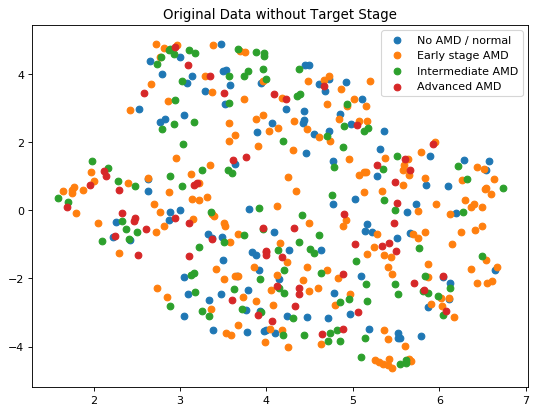

In [11]:
# Actual case where no classification is provided
X_embedded = umap.UMAP(
    n_components = params[0],
    n_neighbors = params[1],
    min_dist = params[2],
    metric = params[3]
).fit_transform(X)

fig, ax = plt.subplots(figsize = (8, 6), dpi = 80, facecolor = 'w', edgecolor = 'k')
pc1 = ax.scatter(X_embedded[y == 0, 0], X_embedded[y == 0, 1], label = 'No AMD / normal')
pc2 = ax.scatter(X_embedded[y == 1, 0], X_embedded[y == 1, 1], label = 'Early stage AMD')
pc3 = ax.scatter(X_embedded[y == 2, 0], X_embedded[y == 2, 1], label = 'Intermediate AMD')
pc4 = ax.scatter(X_embedded[y == 3, 0], X_embedded[y == 3, 1], label = 'Advanced AMD')
ax.set_title("Original Data without Target Stage")
ax.legend()
plt.show()

In [12]:
# Divide cleaned data into 4 group according to AMD stages
cleaned_stage1 = cleaned[cleaned.r_id.str.contains('_1')]
cleaned_stage2 = cleaned[cleaned.r_id.str.contains('_2')]
cleaned_stage3 = cleaned[cleaned.r_id.str.contains('_3')]
cleaned_stage4 = cleaned[cleaned.r_id.str.contains('_4')]
X = np.vstack([cleaned_stage1, cleaned_stage2, cleaned_stage3, cleaned_stage4])

label_stage1 = np.zeros(len(cleaned_stage1))
label_stage2 = np.ones(len(cleaned_stage2))
label_stage3 = np.full(len(cleaned_stage3), 2)
label_stage4 = np.full(len(cleaned_stage4), 3)
y = np.concatenate([label_stage1, label_stage2, label_stage3, label_stage4])

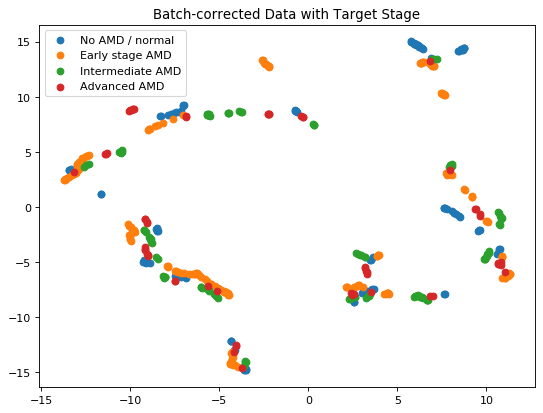

In [13]:
# Ideal case where correct classification (target array) is provided
X_embedded = umap.UMAP(
    n_components = params[0],
    n_neighbors = params[1],
    min_dist = params[2],
    metric = params[3]
).fit_transform(X, y)

fig, ax = plt.subplots(figsize = (8, 6), dpi = 80, facecolor = 'w', edgecolor = 'k')
pc1 = ax.scatter(X_embedded[y == 0, 0], X_embedded[y == 0, 1], label = 'No AMD / normal')
pc2 = ax.scatter(X_embedded[y == 1, 0], X_embedded[y == 1, 1], label = 'Early stage AMD')
pc3 = ax.scatter(X_embedded[y == 2, 0], X_embedded[y == 2, 1], label = 'Intermediate AMD')
pc4 = ax.scatter(X_embedded[y == 3, 0], X_embedded[y == 3, 1], label = 'Advanced AMD')
ax.set_title("Batch-corrected Data with Target Stage")
ax.legend()
plt.show()

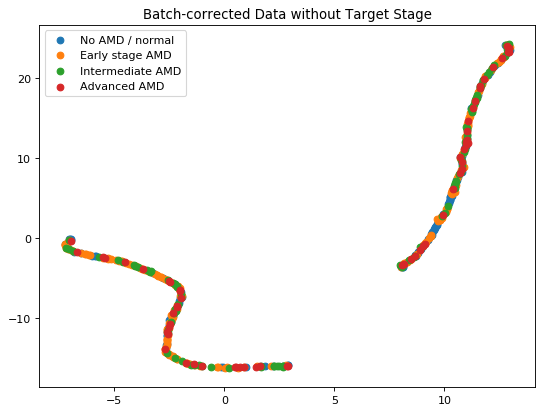

In [14]:
# Actual case where no classification is provided
X_embedded = umap.UMAP(
    n_components = params[0],
    n_neighbors = params[1],
    min_dist = params[2],
    metric = params[3]
).fit_transform(X)

fig, ax = plt.subplots(figsize = (8, 6), dpi = 80, facecolor = 'w', edgecolor = 'k')
pc1 = ax.scatter(X_embedded[y == 0, 0], X_embedded[y == 0, 1], label = 'No AMD / normal')
pc2 = ax.scatter(X_embedded[y == 1, 0], X_embedded[y == 1, 1], label = 'Early stage AMD')
pc3 = ax.scatter(X_embedded[y == 2, 0], X_embedded[y == 2, 1], label = 'Intermediate AMD')
pc4 = ax.scatter(X_embedded[y == 3, 0], X_embedded[y == 3, 1], label = 'Advanced AMD')
ax.set_title("Batch-corrected Data without Target Stage")
ax.legend()
plt.show()

## Dimentional Reduction for Data in Training Set

In [15]:
# Divide data in training set into 4 group according to AMD stages
train_stage1 = train[train.r_id.str.contains('_1')]
train_stage2 = train[train.r_id.str.contains('_2')]
train_stage3 = train[train.r_id.str.contains('_3')]
train_stage4 = train[train.r_id.str.contains('_4')]
X = np.vstack([train_stage1, train_stage2, train_stage3, train_stage4])

label_stage1 = np.zeros(len(train_stage1))
label_stage2 = np.ones(len(train_stage2))
label_stage3 = np.full(len(train_stage3), 2)
label_stage4 = np.full(len(train_stage4), 3)
y = np.concatenate([label_stage1, label_stage2, label_stage3, label_stage4])

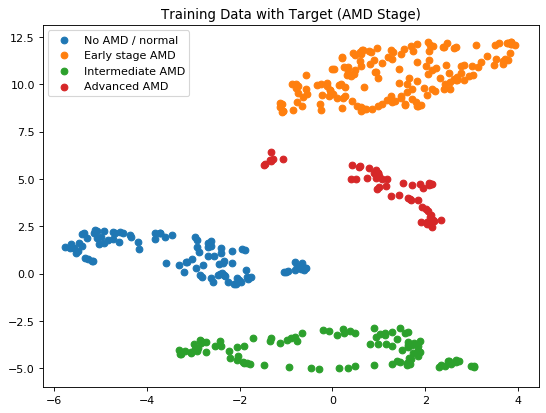

In [16]:
# Ideal case where correct classification (target array) is provided
X_embedded = umap.UMAP(
    n_components = params[0],
    n_neighbors = params[1],
    min_dist = params[2],
    metric = params[3]
).fit_transform(X, y)

fig, ax = plt.subplots(figsize = (8, 6), dpi = 80, facecolor = 'w', edgecolor = 'k')
pc1 = ax.scatter(X_embedded[y == 0, 0], X_embedded[y == 0, 1], label = 'No AMD / normal')
pc2 = ax.scatter(X_embedded[y == 1, 0], X_embedded[y == 1, 1], label = 'Early stage AMD')
pc3 = ax.scatter(X_embedded[y == 2, 0], X_embedded[y == 2, 1], label = 'Intermediate AMD')
pc4 = ax.scatter(X_embedded[y == 3, 0], X_embedded[y == 3, 1], label = 'Advanced AMD')
ax.set_title("Training Data with Target (AMD Stage)")
ax.legend()
plt.show()

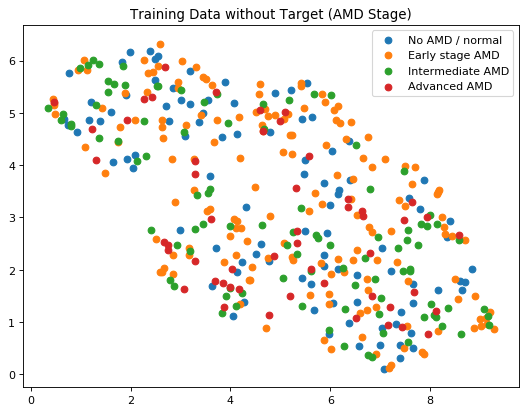

In [17]:
# Actual case where no classification is provided
X_embedded = umap.UMAP(
    n_components = params[0],
    n_neighbors = params[1],
    min_dist = params[2],
    metric = params[3]
).fit_transform(X)

fig, ax = plt.subplots(figsize = (8, 6), dpi = 80, facecolor = 'w', edgecolor = 'k')
pc1 = ax.scatter(X_embedded[y == 0, 0], X_embedded[y == 0, 1], label = 'No AMD / normal')
pc2 = ax.scatter(X_embedded[y == 1, 0], X_embedded[y == 1, 1], label = 'Early stage AMD')
pc3 = ax.scatter(X_embedded[y == 2, 0], X_embedded[y == 2, 1], label = 'Intermediate AMD')
pc4 = ax.scatter(X_embedded[y == 3, 0], X_embedded[y == 3, 1], label = 'Advanced AMD')
ax.set_title("Training Data without Target (AMD Stage)")
ax.legend()
plt.show()

In [18]:
# Divide data in training set into 4 group according to AMD stages
df_F = df[df.sex.str.contains('F')].drop(['rna_isolation_batch', 'library_prepper', 'sex', 'age'], axis = 1)
df_M = df[df.sex.str.contains('M')].drop(['rna_isolation_batch', 'library_prepper', 'sex', 'age'], axis = 1)
X = np.vstack([df_F, df_M])

label_F = np.zeros(len(df_F))
label_M = np.ones(len(df_M))
y = np.concatenate([label_F, label_M])

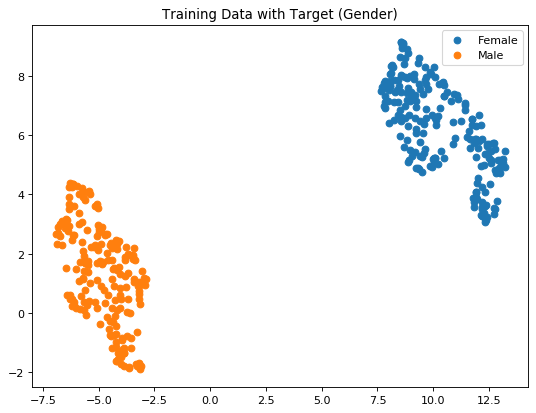

In [19]:
# Ideal case where correct classification (target array) is provided
X_embedded = umap.UMAP(
    n_components = params[0],
    n_neighbors = params[1],
    min_dist = params[2],
    metric = params[3]
).fit_transform(X, y)

fig, ax = plt.subplots(figsize = (8, 6), dpi = 80, facecolor = 'w', edgecolor = 'k')
pc1 = ax.scatter(X_embedded[y == 0, 0], X_embedded[y == 0, 1], label = 'Female')
pc2 = ax.scatter(X_embedded[y == 1, 0], X_embedded[y == 1, 1], label = 'Male')
ax.set_title("Training Data with Target (Gender)")
ax.legend()
plt.show()

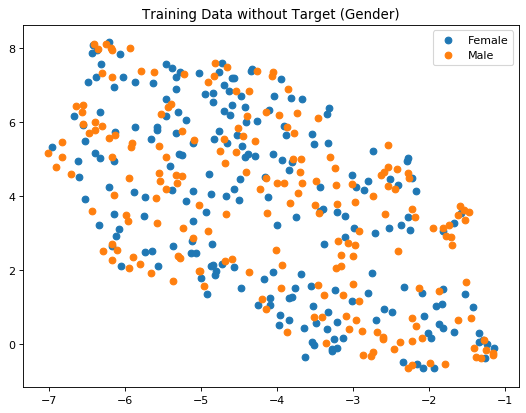

In [20]:
# Actual case where no classification is provided
X_embedded = umap.UMAP(
    n_components = params[0],
    n_neighbors = params[1],
    min_dist = params[2],
    metric = params[3]
).fit_transform(X)

fig, ax = plt.subplots(figsize = (8, 6), dpi = 80, facecolor = 'w', edgecolor = 'k')
pc1 = ax.scatter(X_embedded[y == 0, 0], X_embedded[y == 0, 1], label = 'Female')
pc2 = ax.scatter(X_embedded[y == 1, 0], X_embedded[y == 1, 1], label = 'Male')
ax.set_title("Training Data without Target (Gender)")
ax.legend()
plt.show()

In [21]:
# Divide data in training set into 4 group according to AMD stages
df_1 = df[df.rna_isolation_batch.str.contains('1')].drop(['rna_isolation_batch', 'library_prepper', 'sex', 'age'], axis = 1)
df_2 = df[df.rna_isolation_batch.str.contains('2')].drop(['rna_isolation_batch', 'library_prepper', 'sex', 'age'], axis = 1)
X = np.vstack([df_1, df_2])

label_1 = np.zeros(len(df_1))
label_2 = np.ones(len(df_2))
y = np.concatenate([label_1, label_2])

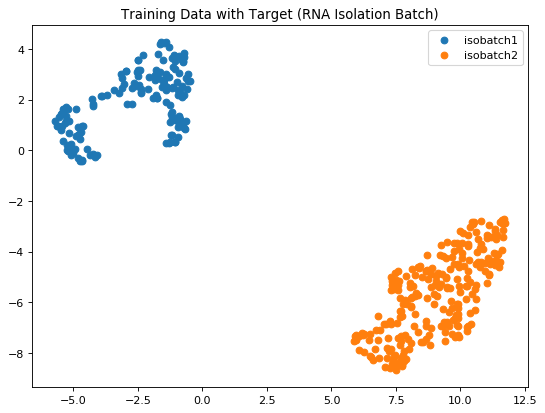

In [22]:
# Ideal case where correct classification (target array) is provided
X_embedded = umap.UMAP(
    n_components = params[0],
    n_neighbors = params[1],
    min_dist = params[2],
    metric = params[3]
).fit_transform(X, y)

fig, ax = plt.subplots(figsize = (8, 6), dpi = 80, facecolor = 'w', edgecolor = 'k')
pc1 = ax.scatter(X_embedded[y == 0, 0], X_embedded[y == 0, 1], label = 'isobatch1')
pc2 = ax.scatter(X_embedded[y == 1, 0], X_embedded[y == 1, 1], label = 'isobatch2')
ax.set_title("Training Data with Target (RNA Isolation Batch)")
ax.legend()
plt.show()

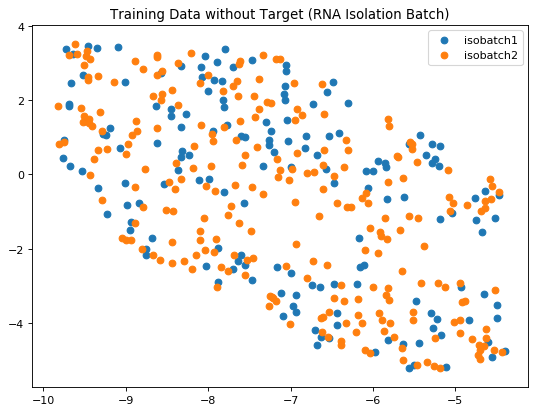

In [23]:
# Actual case where no classification is provided
X_embedded = umap.UMAP(
    n_components = params[0],
    n_neighbors = params[1],
    min_dist = params[2],
    metric = params[3]
).fit_transform(X)

fig, ax = plt.subplots(figsize = (8, 6), dpi = 80, facecolor = 'w', edgecolor = 'k')
pc1 = ax.scatter(X_embedded[y == 0, 0], X_embedded[y == 0, 1], label = 'isobatch1')
pc2 = ax.scatter(X_embedded[y == 1, 0], X_embedded[y == 1, 1], label = 'isobatch2')
ax.set_title("Training Data without Target (RNA Isolation Batch)")
ax.legend()
plt.show()

In [24]:
# Divide data in training set into 4 group according to AMD stages
df_MRS = df[df.library_prepper.str.contains('MRS')].drop(['rna_isolation_batch', 'library_prepper', 'sex', 'age'], axis = 1)
df_RRP = df[df.library_prepper.str.contains('RRP')].drop(['rna_isolation_batch', 'library_prepper', 'sex', 'age'], axis = 1)
X = np.vstack([df_MRS, df_RRP])

label_MRS = np.zeros(len(df_MRS))
label_RRP = np.ones(len(df_RRP))
y = np.concatenate([label_MRS, label_RRP])

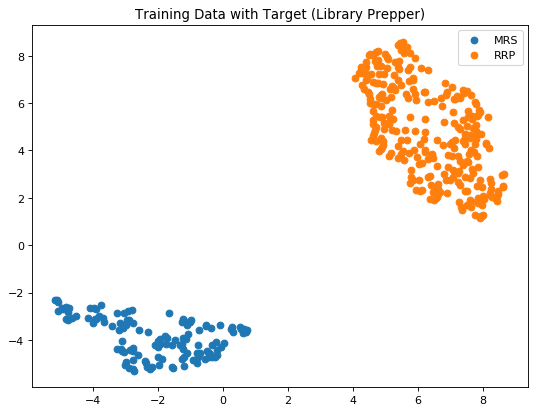

In [25]:
# Ideal case where correct classification (target array) is provided
X_embedded = umap.UMAP(
    n_components = params[0],
    n_neighbors = params[1],
    min_dist = params[2],
    metric = params[3]
).fit_transform(X, y)

fig, ax = plt.subplots(figsize = (8, 6), dpi = 80, facecolor = 'w', edgecolor = 'k')
pc1 = ax.scatter(X_embedded[y == 0, 0], X_embedded[y == 0, 1], label = 'MRS')
pc2 = ax.scatter(X_embedded[y == 1, 0], X_embedded[y == 1, 1], label = 'RRP')
ax.set_title("Training Data with Target (Library Prepper)")
ax.legend()
plt.show()

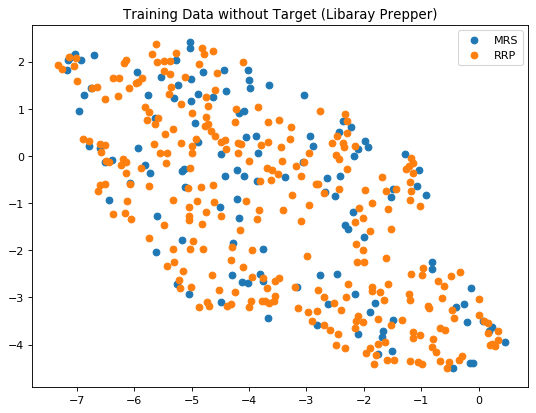

In [26]:
# Actual case where no classification is provided
X_embedded = umap.UMAP(
    n_components = params[0],
    n_neighbors = params[1],
    min_dist = params[2],
    metric = params[3]
).fit_transform(X)

fig, ax = plt.subplots(figsize = (8, 6), dpi = 80, facecolor = 'w', edgecolor = 'k')
pc1 = ax.scatter(X_embedded[y == 0, 0], X_embedded[y == 0, 1], label = 'MRS')
pc2 = ax.scatter(X_embedded[y == 1, 0], X_embedded[y == 1, 1], label = 'RRP')
ax.set_title("Training Data without Target (Libaray Prepper)")
ax.legend()
plt.show()